# 数据挖掘大作业一：数据探索性分析与数据预处理

## (1)数据集：Wine Reviews

In [1]:
#导入必要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools
#import json
import copy

In [2]:
#读取数据集
homework_file1 = r"winemag-data-130k-v2.csv"
csv_file = pd.read_csv(homework_file1, low_memory=False)

In [3]:
csv_file

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


### 对于数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数

In [4]:
# 数值属性统计
def numeric_statistic(csv_file, numeric_attr):
    result_dict = {}
    for column in numeric_attr:
        column_series = copy.copy(csv_file[column])
        clean_series = column_series.dropna()

        num_of_NaN = column_series.__len__() - clean_series.__len__()

        clean_list = clean_series.values.tolist()

        clean_list.sort()
        len = clean_list.__len__()
        max_value = clean_list[-1]
        min_value = clean_list[0]
        sum_value = sum(clean_list)
        mean_value = sum_value / clean_list.__len__()

        Q1 = clean_list[int((len + 1) * 0.25)]
        Q2 = clean_list[int((len + 1) * 0.5)]
        Q3 = clean_list[int((len + 1) * 0.75)]

        result = [column,max_value, min_value, mean_value, Q2, [Q1, Q2, Q3], num_of_NaN]
        print(result)

#### 该数据集存在points和price两个数值属性

In [5]:
numeric_attr = ['points','price']

In [6]:
numeric_statistic(csv_file, numeric_attr)

['points', 100, 80, 88.44713820775404, 88, [86, 88, 91], 0]
['price', 3300.0, 4.0, 35.363389129985535, 25.0, [17.0, 25.0, 42.0], 8996]


#### points属性中，最大值100，最小值80，均值88.45，中位数88，四分位数[86,88,91],缺失值个数为0；

#### price属性中，最大值3300，最小值4，均值35.36，中位数25，四分位数[17,25,42],缺失值个数为8996

### 对标称属性，给出每个可能取值的频数

In [7]:
def nominal_statistic(csv_file, nominal_attr):
    result_dict = {}
    for column in csv_file.columns:
        #print(column)
        if column in nominal_attr :
            result_dict[column] = csv_file[column].value_counts().to_dict()
    print(result_dict)

In [8]:
nominal_attr = ['country','designation','province','region_1','region_2','variety','winery']

In [9]:
nominal_statistic(csv_file, nominal_attr)

{'country': {'US': 54504, 'France': 22093, 'Italy': 19540, 'Spain': 6645, 'Portugal': 5691, 'Chile': 4472, 'Argentina': 3800, 'Austria': 3345, 'Australia': 2329, 'Germany': 2165, 'New Zealand': 1419, 'South Africa': 1401, 'Israel': 505, 'Greece': 466, 'Canada': 257, 'Hungary': 146, 'Bulgaria': 141, 'Romania': 120, 'Uruguay': 109, 'Turkey': 90, 'Slovenia': 87, 'Georgia': 86, 'England': 74, 'Croatia': 73, 'Mexico': 70, 'Moldova': 59, 'Brazil': 52, 'Lebanon': 35, 'Morocco': 28, 'Peru': 16, 'Ukraine': 14, 'Serbia': 12, 'Czech Republic': 12, 'Macedonia': 12, 'Cyprus': 11, 'India': 9, 'Switzerland': 7, 'Luxembourg': 6, 'Armenia': 2, 'Bosnia and Herzegovina': 2, 'China': 1, 'Egypt': 1, 'Slovakia': 1}, 'designation': {'Reserve': 2009, 'Estate': 1322, 'Reserva': 1259, 'Riserva': 698, 'Estate Grown': 621, 'Brut': 513, 'Dry': 413, 'Barrel sample': 375, 'Crianza': 343, 'Estate Bottled': 342, 'Vieilles Vignes': 308, 'Brut Rosé': 276, 'Gran Reserva': 261, 'Barrel Sample': 252, 'Tradition': 238, 'Old

#### 该数据集存在'country','designation','province','region_1','region_2','variety','winery'七个标称属性

#### 以country为例，降序排序，其中US：54504，France：22093，Italy：19540，Spain：6654...统计出所有标称属性所有取值的数量

### 针对数值属性 1、绘制直方图，用qq图检验其分布是否为正态分布  2、绘制盒图，对离群值进行识别

In [10]:
# 数据清洗
def clean_data(csv_file, column, percent):
    # 去除缺失值
    values_dropna = csv_file[column].dropna().values
    values_count = csv_file[column].dropna().value_counts()
    values_clean = list(values_dropna)

    # 为加快速度，对所有取值种类的频数-1，近似等效于去除频率为1的值
    for item in values_count.index:
        values_clean.remove(item)

    values_clean.sort()
    len = values_clean.__len__()

    # 按percent比例截尾
    vc = values_clean[int(len * percent):int(len * (1 - percent))]

    return values_dropna, values_clean, vc

In [11]:
# 盒形图
def draw_box(column, values_clean):
    plt.figure(figsize=(2.8,2))
    # 离散点 (图标样式,图标颜色,大小,..)
    fp = {'marker': "o", 'markerfacecolor': 'blue', 'markersize': 5, 'linestyle': 'none'}
    plt.title("Box:" + str(column))
    plt.boxplot(values_clean, flierprops=fp)
    plt.show()

# 直方图
def draw_hist(column, vc):
    plt.figure(figsize=(2.8, 2))
    plt.title("Hist:" + str(column))
    plt.hist(vc, bins=20)
    plt.show()
    pass

In [12]:
# qq图检测是否为正态分布
def draw_qq_norm(column, vc):
    plt.figure(figsize=(2.8, 2))
    stats.probplot(vc, dist="norm", plot=plt)
    plt.title("Q-Q:" + str(column))
    plt.show()

# qq图检测两属性间的相关度
def draw_qq_double(csv_file, double_column):
    data = csv_file[list(double_column)].dropna()
    x = data[double_column[0]].values
    y = data[double_column[1]].values

    plt.figure(figsize=(2.8,2))
    plt.title(double_column[0] + "_" + double_column[1])
    plt.plot(x, y, 'ro')
    plt.show()


In [13]:
# 画图
def draw_numeric(csv_file, numeric_attr):
    for column in numeric_attr:
        values_dropna, values_clean, vc = clean_data(csv_file, column, 0.05)
        draw_hist(column, vc)
        draw_qq_norm(column, vc)
        draw_box(column, values_clean)

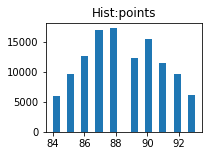

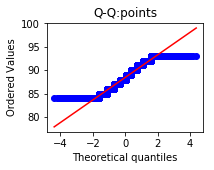

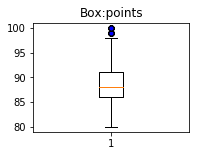

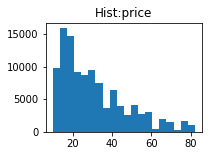

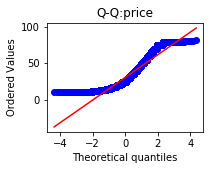

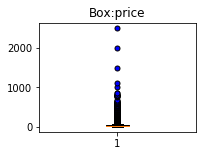

In [14]:
draw_numeric(csv_file, numeric_attr)

#### 由盒形图、箱型图、QQ图分析可以得出，price属性分布不符合正态分布；points属性分布符合正太分布特征，但不是完全正太分布

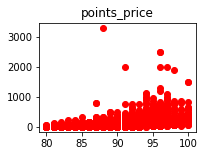

In [15]:
# 绘制两个属性的qq图，判断相关性
for double_column in itertools.combinations(numeric_attr, r=2):
    draw_qq_double(csv_file, double_column)

#### 如图所示，可以大致判断，points和price属性具有一定的相关性，成正相关

### 数据缺失的处理
    1、将缺失部分剔除 
    2、用最高频率值来填补缺失值 
    3、通过属性的相关关系来填补缺失值 
    4、通过数据对象之间的相似性来填补缺失值

#### 接下来将使用上述四种方式对缺失数据经行处理，输出盒形图、直方图、QQ图；

#### 并统计处理后数据的最大值，最小值，均值，中位数以及四分位数输出，并添加在resultdict中，最后做比较分析

In [16]:
resultdict=[]

#### 1、将缺失部分剔除

In [17]:
# 缺失数据处理后数值属性统计
def numeric_total(new_column):

    new_column.sort()
    len = new_column.__len__()
    max_value = new_column[-1]
    min_value = new_column[0]
    sum_value = sum(new_column)
    mean_value = sum_value / new_column.__len__()

    Q1 = new_column[int((len + 1) * 0.25)]
    Q2 = new_column[int((len + 1) * 0.5)]
    Q3 = new_column[int((len + 1) * 0.75)]

    result = [max_value, min_value, mean_value, Q2, [Q1, Q2, Q3]]
    resultdict.append(result)
    print(result)

In [18]:
# 去除缺失值 绘图函数
def complete_dropna(csv_file, column):
    values_dropna = csv_file[column].dropna().values
    draw_hist(column, values_dropna)
    draw_qq_norm(column, values_dropna)
    draw_box(column, values_dropna)

    numeric_total(values_dropna)

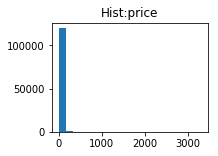

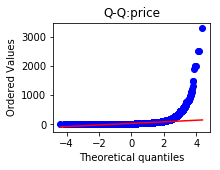

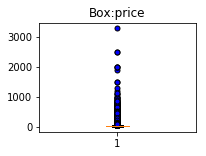

[3300.0, 4.0, 35.363389129985535, 25.0, [17.0, 25.0, 42.0]]


In [19]:
complete_dropna(csv_file, 'price')

#### 2、用最高频率值来填补缺失值

In [20]:
# 用最高频率值来填补缺失值 绘图函数
def complete_fre_attr(csv_file, column):
    value_count = csv_file[column].dropna().value_counts()
    max_fre_value = value_count.index[0]
    data = csv_file[column]
    miss_index = data[data.isnull()].index
    complete_data = data.copy()
    for i in miss_index:
        complete_data[i] = max_fre_value

    draw_hist(column, complete_data)
    draw_qq_norm(column, complete_data)
    draw_box(column, complete_data)
    
    #print(list(complete_data))
    numeric_total(list(complete_data))

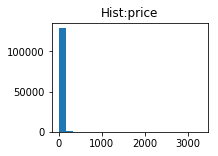

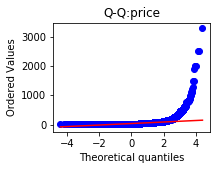

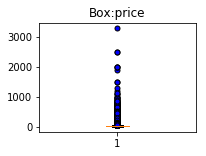

[3300.0, 4.0, 34.30000538581684, 25.0, [18.0, 25.0, 40.0]]


In [21]:
complete_fre_attr(csv_file, 'price')

#### 3、通过属性的相关关系来填补缺失值 绘图函数

In [22]:
# 通过属性的相关关系来填补缺失值 绘图函数
def complete_rel_attr(csv_file, double_column):
    target_data = csv_file[double_column[0]]
    source_data = csv_file[double_column[1]]
    flag1 = target_data.isnull().values
    flag2 = source_data.isnull().values
    complete_data = target_data.copy()
    for index, value in target_data.iteritems():
        if flag1[index] == True and flag2[index] == False:

            complete_data[index] = 1 - source_data[index]

    values_clean = list(complete_data.dropna().values)

    # 去除频率为1的值
    for value, count in complete_data.value_counts().iteritems():
        if count == 1:
            values_clean.remove(value)

    draw_hist(double_column[0], values_clean)
    draw_qq_norm(double_column[0], values_clean)
    draw_box(double_column[0], values_clean)
    
    numeric_total(values_clean)
    
    

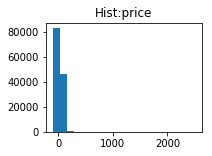

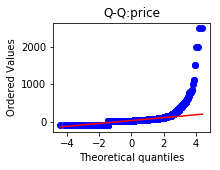

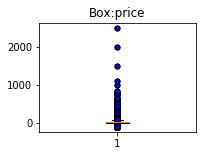

[2500.0, -98.0, 26.42391245754946, 25.0, [15.0, 25.0, 40.0]]


In [23]:
complete_rel_attr(csv_file, ['price', 'points'])

#### 4、通过数据对象之间的相似性来填补缺失值

In [24]:
# 查找两个对象间相异度最小的 指定的 column值
def find_dis_value(csv_file, pos, column, numeric_attr):

    def dis_objs(tar_obj, sou_obj):
        dis_value = 0
        count = 0
        for column in tar_obj.index:
            if tar_obj[column] != np.NaN and sou_obj[column] != np.NaN:
                if column in numeric_attr:
                        values_sort = csv_file[column].dropna().values.sort()
                        denominator = values_sort[-1] - values_sort[0]
                        dis_value += abs(tar_obj[column] - sou_obj[column])/denominator
                        count += 1

                elif tar_obj[column] == sou_obj[column]:
                    dis_value += 1
                count += 1
            else:
                continue
        return dis_value/count

    mindis = 9999
    result_pos = -1
    target_obj = csv_file.ix[pos]
    for index in csv_file.index:
        if index == pos:
            continue
        source_obj = csv_file.ix(index)
        tmp = dis_objs(target_obj, source_obj)
        if tmp < mindis:
            result_pos = index
    return result_pos

# 通过数据对象之间的相似性来填补缺失值 绘图函数
def complete_smi_attr(csv_file, column, numeric_attr):
    data = csv_file[column].copy()
    for index, value in data.iteritems():
        if value == np.NaN:
            data[index] = data[find_dis_value(csv_file, index, column, numeric_attr)]
    draw_hist(column, data.dropna().values)
    draw_qq_norm(column, data.dropna().values)
    draw_box(column, data.dropna().values)
    
    numeric_total(data.dropna().values)

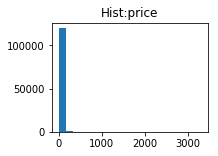

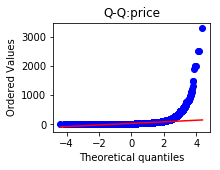

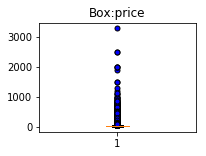

[3300.0, 4.0, 35.363389129985535, 25.0, [17.0, 25.0, 42.0]]


In [25]:
complete_smi_attr(csv_file, 'price', numeric_attr)

In [26]:
resultdict

[[3300.0, 4.0, 35.363389129985535, 25.0, [17.0, 25.0, 42.0]],
 [3300.0, 4.0, 34.30000538581684, 25.0, [18.0, 25.0, 40.0]],
 [2500.0, -98.0, 26.42391245754946, 25.0, [15.0, 25.0, 40.0]],
 [3300.0, 4.0, 35.363389129985535, 25.0, [17.0, 25.0, 42.0]]]

### 通过对比四种缺失值得处理方法得到的结果来看，使用属性的相关关系来填补缺失值得到的数据结果与其他三种有相对明显的差异，其他三种处理方式得到的结果基本相似，至于说哪一种方式的效果更好，则需要在具体的实验中加以验证。